In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)

In [10]:
df = pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [12]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [13]:
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)

165


In [14]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,31529.00000,32416.000000,29321.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.79051,9593.845632,11.017265,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.14549,6322.730241,3.241680,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.00000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [16]:
print("\nTarget value counts:")
print(df["loan_status"].value_counts(dropna=False))
print("\nTarget value proportions:")
print(df["loan_status"].value_counts(normalize=True, dropna=False))


Target value counts:
loan_status
0    25327
1     7089
Name: count, dtype: int64

Target value proportions:
loan_status
0    0.781312
1    0.218688
Name: proportion, dtype: float64


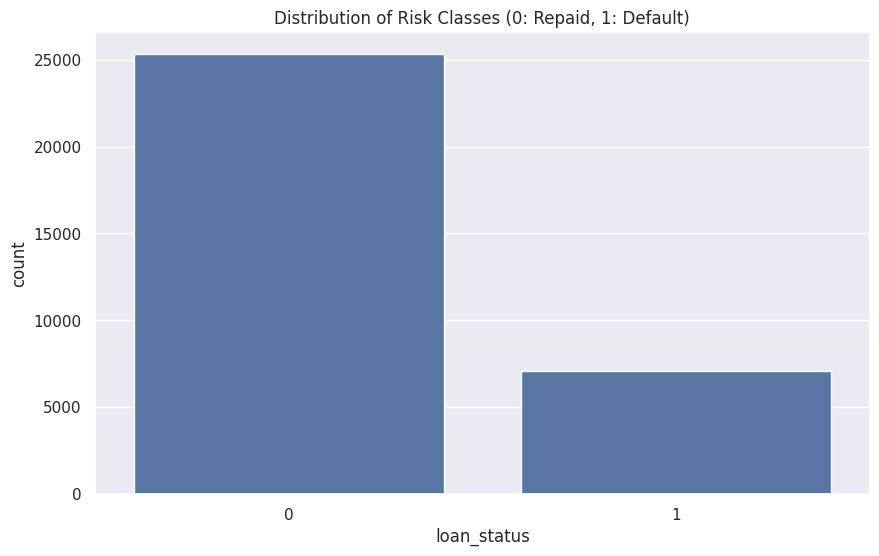

In [30]:
sns.countplot(x="loan_status", data=df)
plt.title("Distribution of Risk Classes (0: Repaid, 1: Default)")
plt.show()

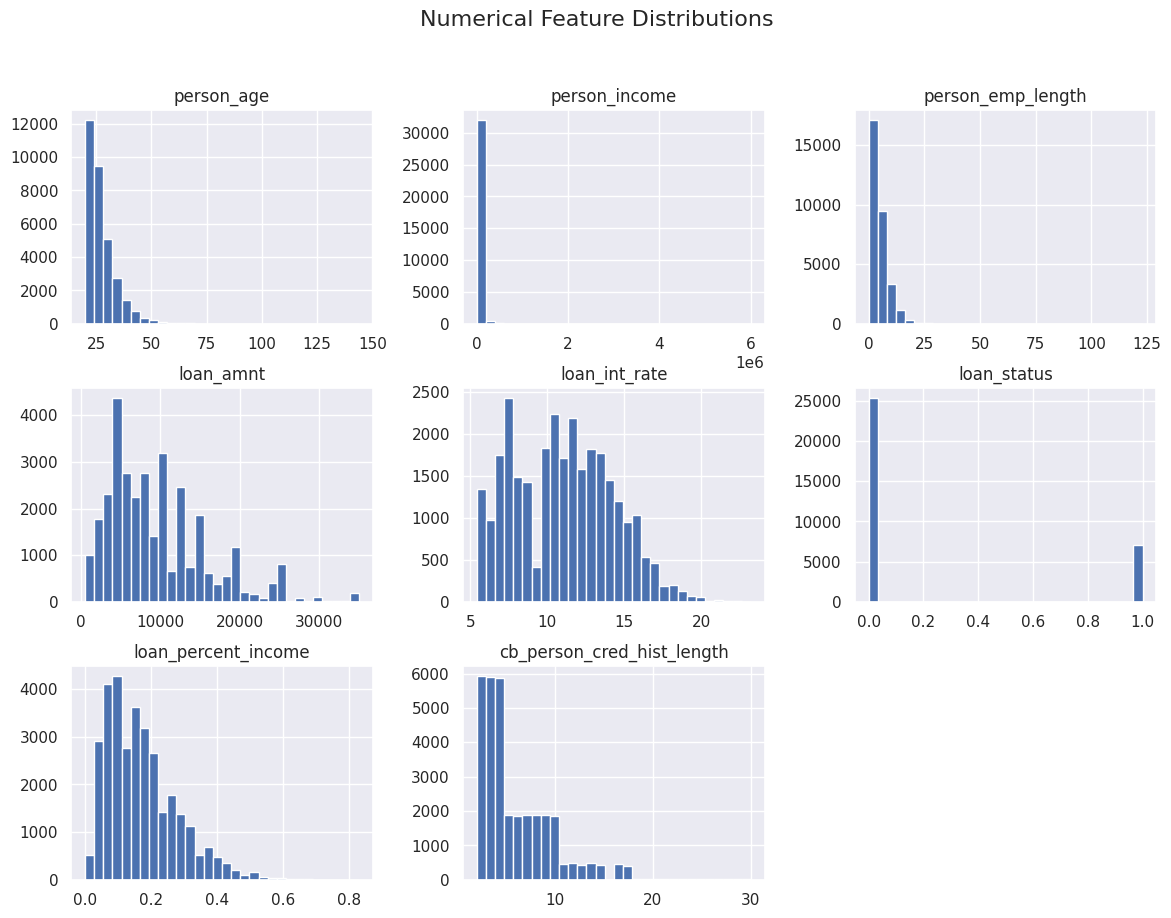

In [31]:
df.hist(figsize=(14,10), bins=30)
plt.suptitle("Numerical Feature Distributions", fontsize=16)
plt.show()


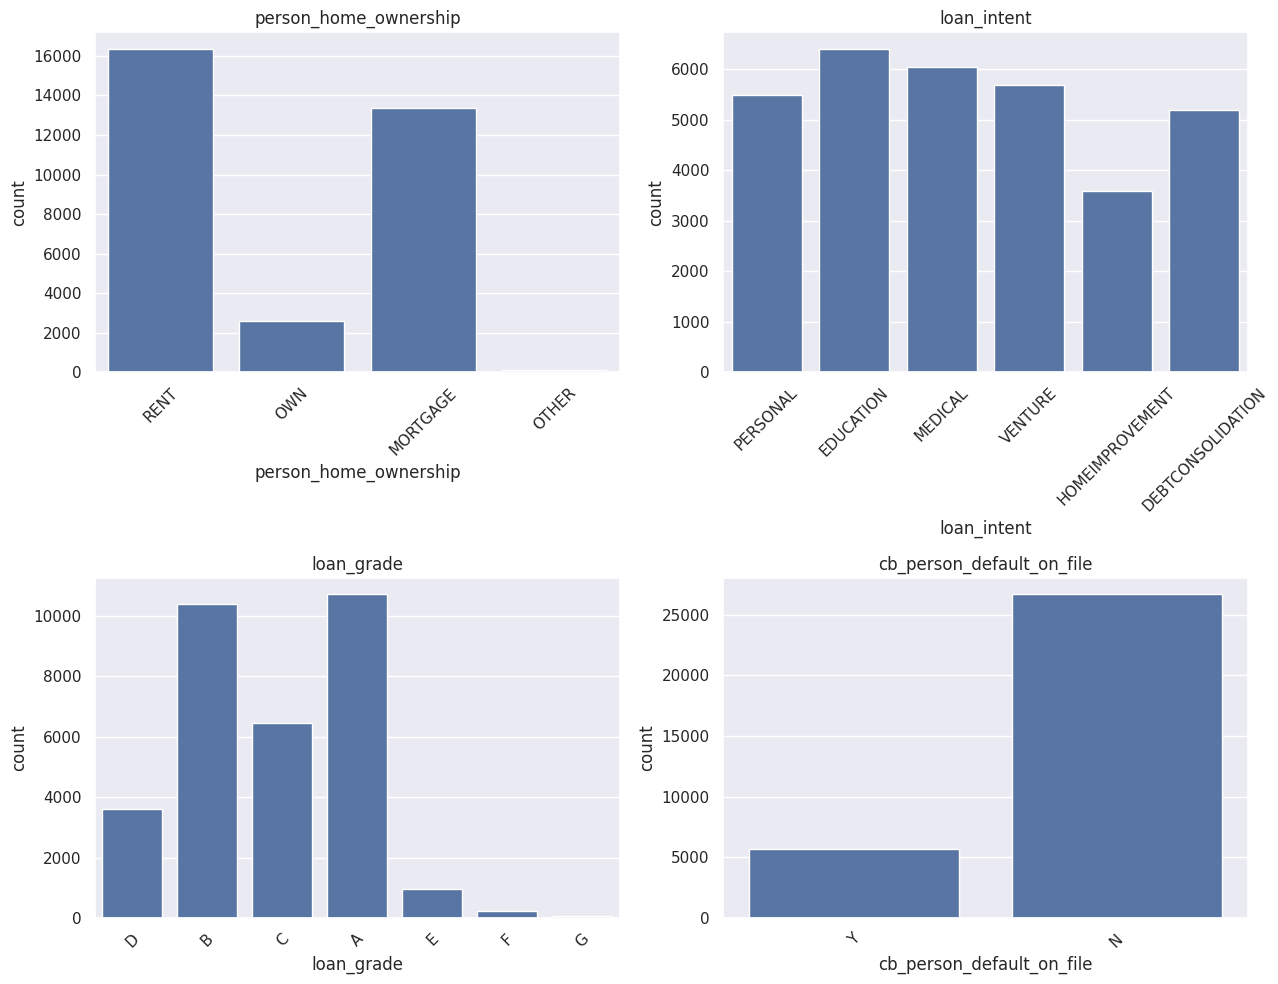

In [32]:
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

plt.figure(figsize=(13,10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2,2,i)
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

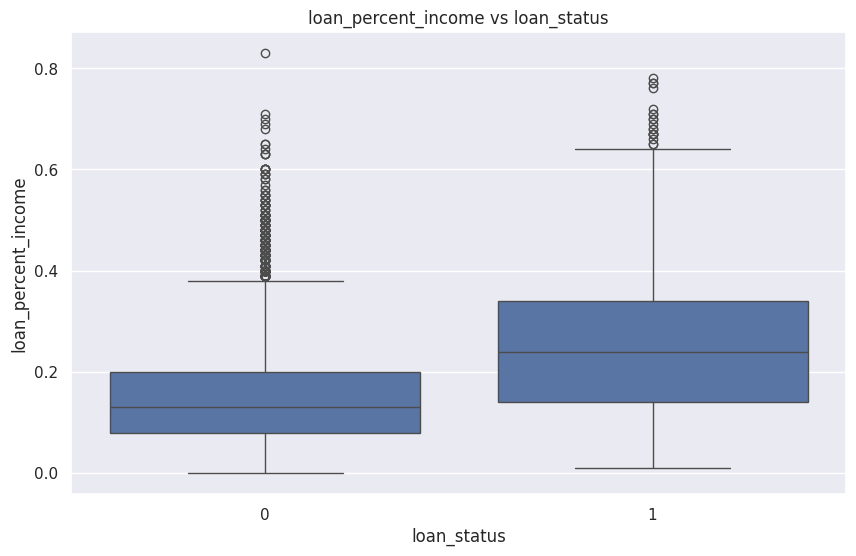

In [33]:
sns.boxplot(x='loan_status', y='loan_percent_income', data=df)
plt.title("loan_percent_income vs loan_status")
plt.show()

<Axes: xlabel='loan_status', ylabel='person_income'>

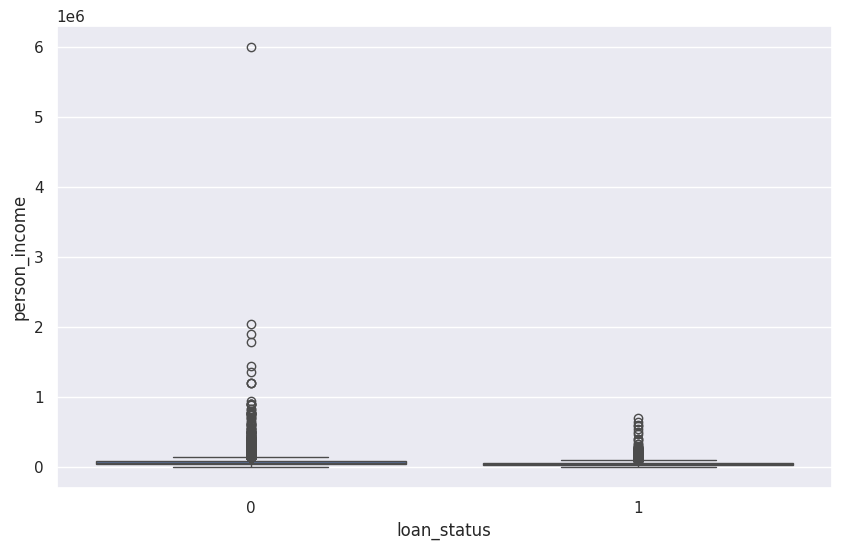

In [34]:
sns.boxplot(x='loan_status', y='person_income', data=df)


<Axes: xlabel='loan_status', ylabel='person_age'>

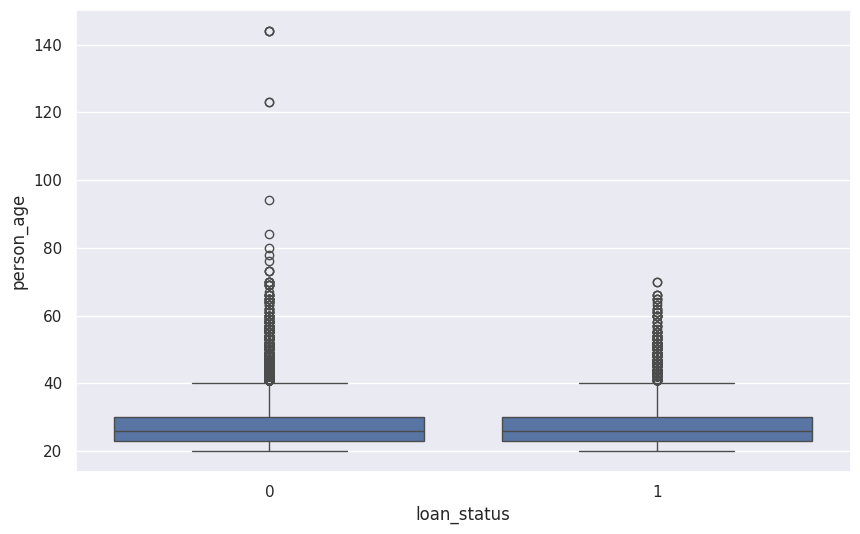

In [35]:
sns.boxplot(x='loan_status', y='person_age', data=df)

In [36]:
df_clean = df.copy()


In [37]:
df_clean['person_age'] = df_clean['person_age'].clip(lower=18, upper=90)

df_clean['person_emp_length'] = df_clean['person_emp_length'].clip(lower=0, upper=50)

df_clean['person_income'] = df_clean['person_income'].clip(lower=0, upper=400000)

In [38]:
df_clean['cb_person_cred_hist_length'] = df_clean[['cb_person_cred_hist_length', 'person_age']].min(axis=1)

In [39]:
df_clean['cb_person_default_on_file'] = df_clean['cb_person_default_on_file'].map({'Y':1, 'N':0})

In [40]:
grade_map = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}

df_clean['loan_grade'] = df_clean['loan_grade'].map(grade_map)

In [41]:
X = df_clean.drop('loan_status', axis=1)
y = df_clean['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    random_state=42, stratify=y
)

In [44]:
numeric_cols = X_train.select_dtypes(include=['int64','float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

numeric_cols, categorical_cols

(Index(['person_age', 'person_income', 'person_emp_length', 'loan_grade',
        'loan_amnt', 'loan_int_rate', 'loan_percent_income',
        'cb_person_default_on_file', 'cb_person_cred_hist_length'],
       dtype='object'),
 Index(['person_home_ownership', 'loan_intent'], dtype='object'))

In [45]:
# Numeric imputer
imputer_num = SimpleImputer(strategy="median")

# Categorical imputer
imputer_cat = SimpleImputer(strategy="most_frequent")

In [46]:
X_train_num = pd.DataFrame(
    imputer_num.fit_transform(X_train[numeric_cols]),
    columns=numeric_cols
)

X_test_num = pd.DataFrame(
    imputer_num.transform(X_test[numeric_cols]),
    columns=numeric_cols
)

X_train_cat = pd.DataFrame(
    imputer_cat.fit_transform(X_train[categorical_cols]),
    columns=categorical_cols
)

X_test_cat = pd.DataFrame(
    imputer_cat.transform(X_test[categorical_cols]),
    columns=categorical_cols
)

In [47]:
X_train_combined = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_combined = pd.concat([X_test_num, X_test_cat], axis=1)

In [48]:
X_train_final = pd.get_dummies(X_train_combined, drop_first=True)
X_test_final = pd.get_dummies(X_test_combined, drop_first=True)

# Align test to train
X_test_final = X_test_final.reindex(columns=X_train_final.columns, fill_value=0)

In [50]:
scaler = StandardScaler()

# Fit on training numeric columns
X_train_scaled = X_train_final.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_final[numeric_cols])

# Apply the same transformation to test
X_test_scaled = X_test_final.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test_final[numeric_cols])


In [53]:
logreg = LogisticRegression(max_iter=200, class_weight='balanced')

logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7916409623689081
Precision: 0.5156761815629387
Recall: 0.7771509167842031
F1 Score: 0.619971870604782
ROC-AUC: 0.8629764123443604

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      5066
           1       0.52      0.78      0.62      1418

    accuracy                           0.79      6484
   macro avg       0.72      0.79      0.74      6484
weighted avg       0.84      0.79      0.80      6484



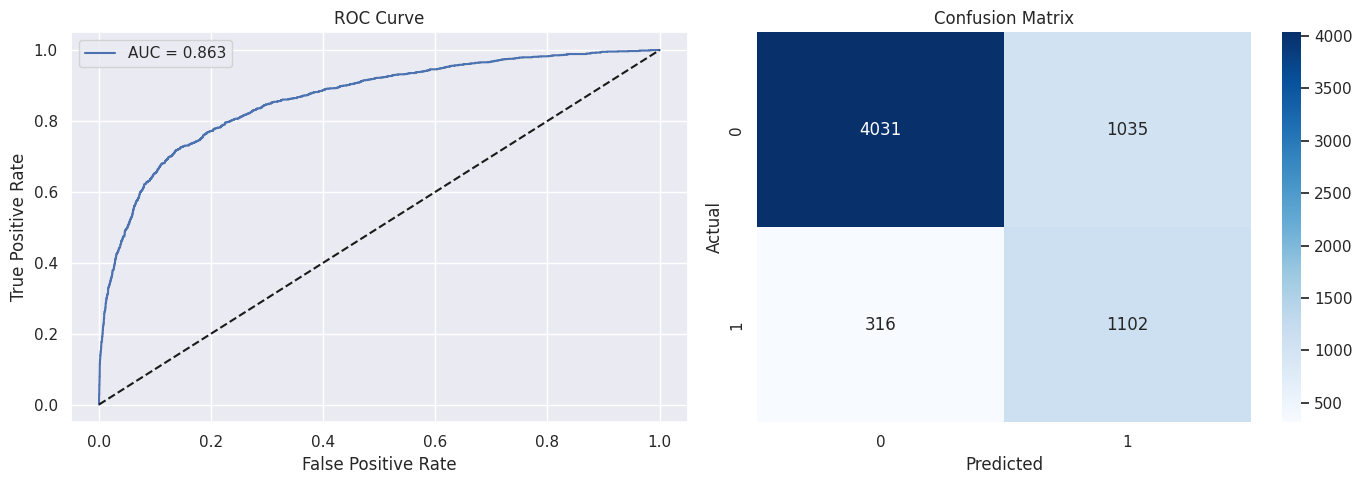

In [54]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# ROC Curve
ax[0].plot(fpr, tpr, label=f"AUC = {auc:.3f}")
ax[0].plot([0,1],[0,1],'k--')
ax[0].set_title("ROC Curve")
ax[0].set_xlabel("False Positive Rate")
ax[0].set_ylabel("True Positive Rate")
ax[0].legend()

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax[1])
ax[1].set_title("Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [55]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',   # handle imbalance
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_final, y_train)

y_pred_rf = rf.predict(X_test_final)
y_proba_rf = rf.predict_proba(X_test_final)[:, 1]

print("=== Random Forest Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

=== Random Forest Metrics ===
Accuracy: 0.9313695249845774
Precision: 0.9467401285583104
Recall: 0.7270803949224259
F1 Score: 0.8224970083765457
ROC-AUC: 0.9330973602606385

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5066
           1       0.95      0.73      0.82      1418

    accuracy                           0.93      6484
   macro avg       0.94      0.86      0.89      6484
weighted avg       0.93      0.93      0.93      6484



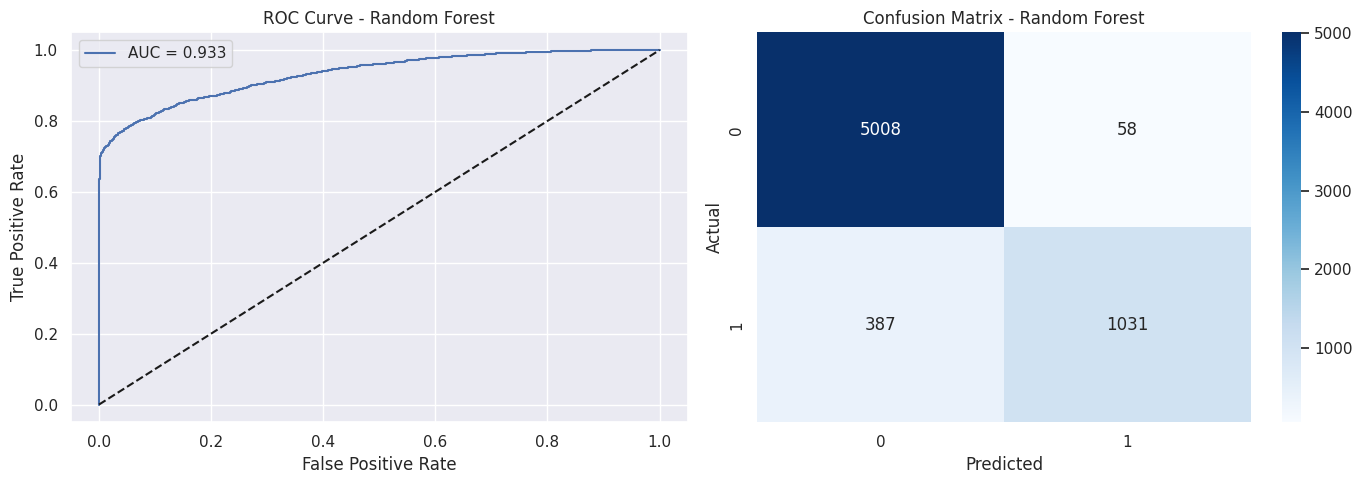

In [56]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

fig, ax = plt.subplots(1, 2, figsize=(14,5))

# ROC
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
ax[0].plot(fpr_rf, tpr_rf, label=f"AUC = {roc_auc_score(y_test, y_proba_rf):.3f}")
ax[0].plot([0,1],[0,1],'k--')
ax[0].set_title("ROC Curve - Random Forest")
ax[0].set_xlabel("False Positive Rate")
ax[0].set_ylabel("True Positive Rate")
ax[0].legend()

# Confusion matrix
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", ax=ax[1])
ax[1].set_title("Confusion Matrix - Random Forest")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [57]:
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos
print("scale_pos_weight:", scale_pos_weight)

scale_pos_weight: 3.5727384940927527


In [59]:
xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,   # imbalance handling
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train_scaled, y_train)

y_proba_xgb = xgb.predict_proba(X_test_scaled)[:, 1]
y_pred_xgb = (y_proba_xgb >= 0.50).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.9097779148673658
Precision: 0.788235294117647
Recall: 0.8032440056417489
F1 Score: 0.7956688787984632
ROC-AUC: 0.9441148350935493

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5066
           1       0.79      0.80      0.80      1418

    accuracy                           0.91      6484
   macro avg       0.87      0.87      0.87      6484
weighted avg       0.91      0.91      0.91      6484



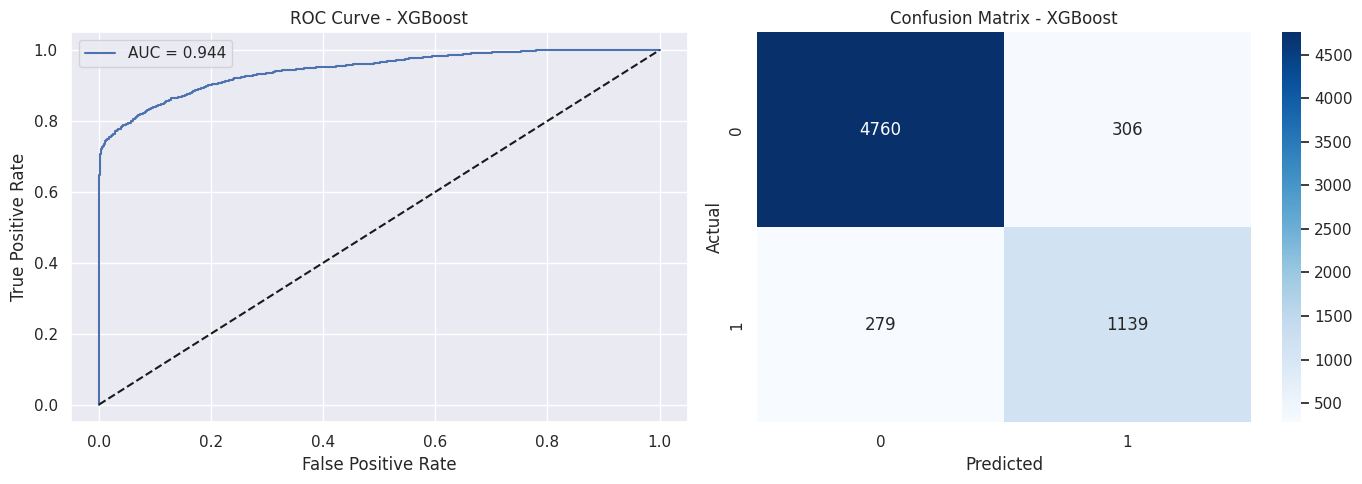

In [60]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# ROC Curve
ax[0].plot(fpr_xgb, tpr_xgb, label=f"AUC = {auc_xgb:.3f}")
ax[0].plot([0,1], [0,1], 'k--')
ax[0].set_title("ROC Curve - XGBoost")
ax[0].set_xlabel("False Positive Rate")
ax[0].set_ylabel("True Positive Rate")
ax[0].legend()

# Confusion Matrix
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", ax=ax[1])
ax[1].set_title("Confusion Matrix - XGBoost")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [62]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],

    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb),
    ],

    "Precision": [
        precision_score(y_test, y_pred),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb),
    ],

    "Recall": [
        recall_score(y_test, y_pred),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb),
    ],

    "F1 Score": [
        f1_score(y_test, y_pred),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb),
    ],

    "ROC-AUC": [
        roc_auc_score(y_test, y_proba),
        roc_auc_score(y_test, y_proba_rf),
        roc_auc_score(y_test, y_proba_xgb),
    ]
})

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.791641,0.515676,0.777151,0.619972,0.862976
1,Random Forest,0.931370,0.946740,0.727080,0.822497,0.933097
2,XGBoost,0.909778,0.788235,0.803244,0.795669,0.944115


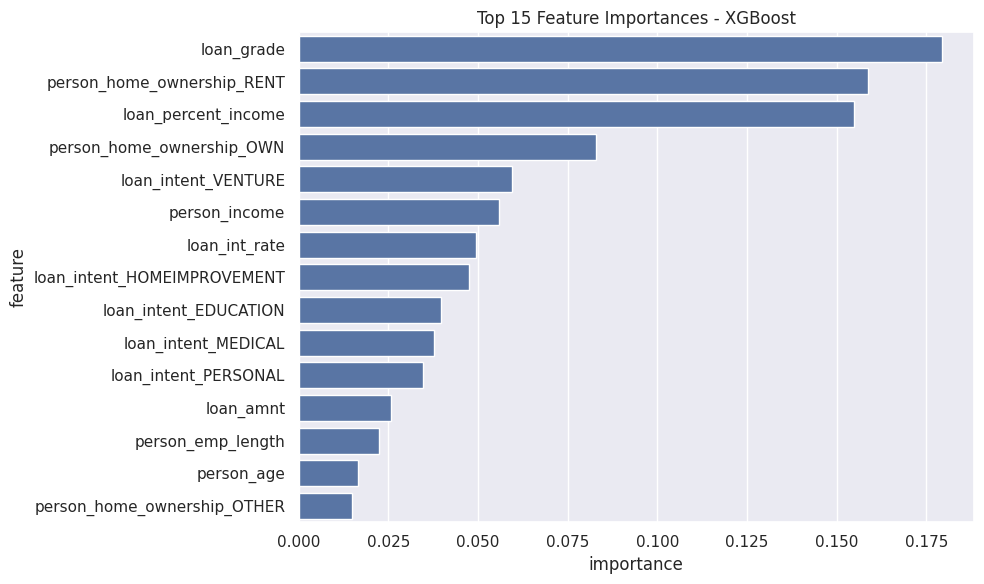

In [63]:
# Feature importance from XGBoost
xgb_importance = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': xgb.feature_importances_
}).sort_values(by='importance', ascending=False)

# Show top 15
plt.figure(figsize=(10, 6))
sns.barplot(data=xgb_importance.head(15), x='importance', y='feature')
plt.title("Top 15 Feature Importances - XGBoost")
plt.tight_layout()
plt.show()


In [64]:
import joblib

joblib.dump(xgb, "xgboost_credit_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']